In [1]:
# pip install xlrd

# import pandas as pd
# df = pd.DataFrame([
#     "simple string",
#     "=2+5+cmd|' /C calc'!A0",
# ])
# # df.to_excel("pandas_minimal.xlsx", header=False, index=False, engine="openpyxl")

In [2]:
# !pip install matplotlib==3.4.3
# !pip installnumpy==1.20.3
# !pip installpandas==1.3.4
# !pip install pywt==1.1.1
# !pip install scipy==1.7.1

In [155]:
import pandas as pd
import numpy as np
import xlrd
xlrd.__version__
import warnings
warnings.filterwarnings('ignore')

In [156]:
file=pd.read_excel('C:/Users/ajit yadav/OneDrive/Documents/Market_Risk/VaR_Methods.xls',sheet_name='RiskFactor',)
portfolio=pd.read_excel('C:/Users/ajit yadav/OneDrive/Documents/Market_Risk/VaR_Methods.xls',sheet_name='Portfolio',)

In [157]:
data=file.iloc[5:,1:6]
data
data.columns=file.iloc[5,1:6].values
data.columns

Index(['Date', 'SPX Index', '1Y Zero', '5Y Yield', 'SPX Vol'], dtype='object')

In [158]:
data.Date=pd.to_datetime(data.Date, errors='coerce')

In [159]:
data

,Date,SPX Index,1Y Zero,5Y Yield,SPX Vol
5,NaT,SPX Index,1Y Zero,5Y Yield,SPX Vol
6,2013-12-31,1848.36,0.3138,1.7411,15.2286
7,2013-12-30,1841.07,0.3083,1.7029,15.1324
8,2013-12-27,1841.4,0.30763,1.7342,14.93
9,2013-12-26,1842.02,0.31691,1.7425,15.0158
...,...,...,...,...,...
755,2011-01-07,1271.5,0.49736,1.9593,20.7772
756,2011-01-06,1273.85,0.49735,2.0652,20.7189
757,2011-01-05,1276.56,0.4869,2.1383,20.5668
758,2011-01-04,1270.2,0.47758,2.0059,21.0841


In [160]:
data.info()
data=data.loc[6:,:]
data.set_index('Date',inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 5 to 759
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       754 non-null    datetime64[ns]
 1   SPX Index  755 non-null    object        
 2   1Y Zero    755 non-null    object        
 3   5Y Yield   755 non-null    object        
 4   SPX Vol    755 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 29.6+ KB


In [161]:
data

,SPX Index,1Y Zero,5Y Yield,SPX Vol
Date,,,,
2013-12-31,1848.36,0.3138,1.7411,15.2286
2013-12-30,1841.07,0.3083,1.7029,15.1324
2013-12-27,1841.4,0.30763,1.7342,14.93
2013-12-26,1842.02,0.31691,1.7425,15.0158
2013-12-24,1833.32,0.31676,1.7326,15.1063
...,...,...,...,...
2011-01-07,1271.5,0.49736,1.9593,20.7772
2011-01-06,1273.85,0.49735,2.0652,20.7189
2011-01-05,1276.56,0.4869,2.1383,20.5668


In [162]:
data.columns.values

array(['SPX Index', '1Y Zero', '5Y Yield', 'SPX Vol'], dtype=object)

In [163]:
log_data=np.log(data.astype('float64')/data.shift().astype('float64'))
volatility=pd.DataFrame(np.std(log_data),columns=['volatility'])
volatility

,volatility
SPX Index,0.010476
1Y Zero,0.028878
5Y Yield,0.042588
SPX Vol,0.023629


In [164]:
last_traded_price=data.head(1)
last_traded_price

,SPX Index,1Y Zero,5Y Yield,SPX Vol
Date,,,,
2013-12-31,1848.36,0.3138,1.7411,15.2286


In [165]:
# portfolio=portfolio.iloc[1:,:]
portfolio.fillna('',inplace=True)
portfolio
# hiding index
# print df.to_string(index=False)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,,Hypothetical Portfolio as of date 2013-12-31,,,,,,
1,,Asset Information,Product Type,Equity,Product Type,Option,Product Type,Bond
2,,,Asset,SPX Index,Asset,SPX Index Call,Asset,5Y T-Bond
3,,,Risk Feature,Linear,Risk Feature,Nonlinear,Risk Feature,Nonlinear
4,,,Notional,1000000,Notional,-1500000,Notional,500000
5,,,Spot,1848.36,Option Type,Call,Settlement Date,2013-12-31 00:00:00
6,,,,,Maturity (years),1,Maturity Date,2018-12-31 00:00:00
7,,,,,1Y Zero Rate,0.003138,Coupon Rate,0.02
8,,,,,Dividend Rate,0,Yield Rate,0.017411
9,,,,,Strike,1848.36,Redemption Value,100


In [166]:
# portfolio.fillna('',inplace=True)
portfolio.columns=portfolio.loc[1].values
portfolio= portfolio.drop(1)
portfolio

,,Asset Information,Product Type,Equity,Product Type,Option,Product Type,Bond
0,,Hypothetical Portfolio as of date 2013-12-31,,,,,,
2,,,Asset,SPX Index,Asset,SPX Index Call,Asset,5Y T-Bond
3,,,Risk Feature,Linear,Risk Feature,Nonlinear,Risk Feature,Nonlinear
4,,,Notional,1000000,Notional,-1500000,Notional,500000
5,,,Spot,1848.36,Option Type,Call,Settlement Date,2013-12-31 00:00:00
6,,,,,Maturity (years),1,Maturity Date,2018-12-31 00:00:00
7,,,,,1Y Zero Rate,0.003138,Coupon Rate,0.02
8,,,,,Dividend Rate,0,Yield Rate,0.017411
9,,,,,Strike,1848.36,Redemption Value,100
10,,,,,Volatility,0.152286,Coupon Frequency,2


In [167]:
log_data.squeeze()

,SPX Index,1Y Zero,5Y Yield,SPX Vol
Date,,,,
2013-12-31,NaN,NaN,NaN,NaN
2013-12-30,-0.003952,-0.017683,-0.022184,-0.006337
2013-12-27,0.000179,-0.002176,0.018214,-0.013466
2013-12-26,0.000337,0.029720,0.004775,0.005730
2013-12-24,-0.004734,-0.000473,-0.005698,0.006009
...,...,...,...,...
2011-01-07,0.001377,0.017013,0.023915,0.002800
2011-01-06,0.001847,-0.000020,0.052640,-0.002810
2011-01-05,0.002125,-0.021235,0.034784,-0.007368


In [168]:
# blank_index = ['']* len(portfolio)
# portfolio.index=blank_index
# len(portfolio.index)
# pd.DataFrame(portfolio.iloc[14:17,][['Equity','Option']].values,index=['delta','vega',])

asset=pd.DataFrame(portfolio.iloc[14:17,][['Equity','Option']].values,columns=['Equity','Option'],index=['delta','vega','pvo1'])

In [169]:
## reducing the values after decimal
# asset=asset.style.set_precision(2)
asset

,Equity,Option
delta,541.020148,-437.038982
vega,,-5956.16264
pvo1,,-71.453722


In [170]:
new_row = pd.Series(data={'Equity':0,'Option':0,'Bond':portfolio.iloc[14]['Bond']}, name='pvo1_5')
new_row
asset=asset.append(new_row).fillna(0)
asset.drop_duplicates(inplace=True)
asset

,Equity,Option,Bond
delta,541.020148,-437.038982,0.00000
vega,,-5956.162640,0.00000
pvo1,,-71.453722,0.00000
pvo1_5,0.0,0.000000,-240.09633


In [171]:
correl_matirx=log_data.corr()
correl_matirx

,SPX Index,1Y Zero,5Y Yield,SPX Vol
SPX Index,1.000000,0.060013,0.454051,-0.823923
1Y Zero,0.060013,1.000000,0.017545,-0.077718
5Y Yield,0.454051,0.017545,1.000000,-0.387608
SPX Vol,-0.823923,-0.077718,-0.387608,1.000000


In [172]:
last_traded_price=last_traded_price.reset_index(drop=True,)
last_traded_price.index=['price']
last_traded_price

,SPX Index,1Y Zero,5Y Yield,SPX Vol
price,1848.36,0.3138,1.7411,15.2286


In [173]:
volatility.index

Index(['SPX Index', '1Y Zero', '5Y Yield', 'SPX Vol'], dtype='object')

In [174]:
last_traded_price.T.index

Index(['SPX Index', '1Y Zero', '5Y Yield', 'SPX Vol'], dtype='object')

In [175]:
risk_factor_info=pd.merge(volatility,last_traded_price.T,on=last_traded_price.T.index)
risk_factor_info=risk_factor_info.rename(columns={'key_0':'risk_factor'})
risk_factor_info.set_index('risk_factor',inplace=True)

In [176]:
asset.index=['SPX Index', '1Y Zero', '5Y Yield', 'SPX Vol']
asset

,Equity,Option,Bond
SPX Index,541.020148,-437.038982,0.00000
1Y Zero,,-5956.162640,0.00000
5Y Yield,,-71.453722,0.00000
SPX Vol,0.0,0.000000,-240.09633


In [177]:
asset.T
asset=asset.replace(r'', 0)
asset

,Equity,Option,Bond
SPX Index,541.020148,-437.038982,0.00000
1Y Zero,0.000000,-5956.162640,0.00000
5Y Yield,0.000000,-71.453722,0.00000
SPX Vol,0.000000,0.000000,-240.09633


In [178]:
risk_factor_info=risk_factor_info.T
risk_factor_info

risk_factor,SPX Index,1Y Zero,5Y Yield,SPX Vol
volatility,0.010476,0.028878,0.042588,0.023629
price,1848.36,0.3138,1.7411,15.2286


In [179]:
asset

,Equity,Option,Bond
SPX Index,541.020148,-437.038982,0.00000
1Y Zero,0.000000,-5956.162640,0.00000
5Y Yield,0.000000,-71.453722,0.00000
SPX Vol,0.000000,0.000000,-240.09633


In [180]:
asset

,Equity,Option,Bond
SPX Index,541.020148,-437.038982,0.00000
1Y Zero,0.000000,-5956.162640,0.00000
5Y Yield,0.000000,-71.453722,0.00000
SPX Vol,0.000000,0.000000,-240.09633


In [181]:
np.matmul(risk_factor_info,correl_matirx)

,0,1,2,3
volatility,0.012077,0.028418,0.038692,-0.003754
price,1836.622181,110.08613,835.092855,-1508.377491


In [182]:
risk_factor_info.iloc[0,:]*risk_factor_info.iloc[1,:]

risk_factor
SPX Index    19.362785
1Y Zero       0.009062
5Y Yield       0.07415
SPX Vol       0.359839
dtype: object

In [183]:
(risk_factor_info.iloc[0,:]*risk_factor_info.iloc[1,:]).shape

(4,)

In [184]:
##ASSET TABLE TO BE REMADE 
risk_factor=asset.T*(risk_factor_info.iloc[0,:]*risk_factor_info.iloc[1,:])

In [185]:
asset_var_covar=np.matmul(np.matmul(risk_factor,correl_matirx),risk_factor.T)
asset_var_covar

,0,1,2
Equity,109739387.751351,-88707200.919981,745695.257909
Option,-88707200.919981,71708873.601815,-602916.478516
Bond,745695.257909,-602916.478516,7464.25863


In [186]:
# asset_var_covar.columns=['Equity','Option','Bond']
asset_var_covar.columns=asset_var_covar.index
asset_vol=np.array(asset_var_covar).diagonal()
asset_vol

array([109739387.75135088, 71708873.60181469, 7464.2586299637815],
      dtype=object)

In [187]:
# asset_var_covar.drop(['columns'],axis=1,inplace=True)
portfolio_vol=np.matmul(np.matmul(risk_factor.sum(),correl_matirx),risk_factor.sum().T)
portfolio_vol

4326881.330619224

In [188]:
# asset_var_covar.sum(axis=1) # columns
correl_asset=asset_var_covar.sum(axis=0)/(asset_vol*portfolio_vol)   # row
correl_asset

Equity         0.0
Option        -0.0
Bond      0.000005
dtype: object

In [189]:
individual_var=[np.percentile(asset_vol[i],100-97.5) for i in range(3) ]
individual_var

[109739387.75135088, 71708873.60181469, 7464.2586299637815]

In [190]:
#component var
individual_var*correl_asset

Equity    5.033159
Option   -4.067882
Bond      0.034723
dtype: object

In [191]:
#increment var

asset_var_covar['Option':'Bond']['Option':'Bond']

,Equity,Option,Bond
Option,-88707200.919981,71708873.601815,-602916.478516
Bond,745695.257909,-602916.478516,7464.25863


In [192]:
#diversified var
portfolio_var=np.percentile(portfolio_vol,100-97.5)
portfolio_var

4326881.330619224

In [193]:
#undiversified var
undiversified_var=sum(individual_var)

In [194]:
#diversification ratio
diversification_ratio=undiversified_var/portfolio_var
diversification_ratio

41.936838971691245

In [195]:
# simulated_distribution = pd.Series(
#             np.random.normal(
#                 Statistics(
#                     array=self.array,
#                     axis=self.axis
#                     ).mean(),
#                 Statistics(
#                     array=self.array,
#                     axis=self.axis
#                     ).std(),
#                 n_iter
#                 )
#             )
        
#         var = simulated_distribution.sort_values(ascending=True).quantile(self.alpha)


In [196]:
# array_sorted = -self.array.sort_values(ascending=False).values
# x1 = max(array_sorted[:self.array.shape[self.axis]-k+1])
# x2 = max(array_sorted[:self.array.shape[self.axis]-(2*k)+1])
# x4 = max(array_sorted[:self.array.shape[self.axis]-(4*k)+1])
# xi = ((1/np.log(2)) * (np.log((x1-x2)/(x2-x4))))

# var = ((((((k/(self.array.shape[self.axis]*self.alpha))**xi)-1)\
#          / (1-2**(-xi))) * (x1-x2)) + x1)

Historical Simulation

In [197]:
# sim=pd.DataFrame(dict(enumerate(data[['SPX Index','1Y Zero','5Y Yield','SPX Vol']].values,start=1)),)
# # for i in data.iterrows():   
# #     return i   
# #     print()  
# sim.T
# his_sim=sim.T

# his_sim.columns=data.columns
# his_sim.iloc[:500]

In [198]:
his_sim=pd.DataFrame(dict(
    (enumerate(
        np.exp(log_data[['SPX Index', '1Y Zero', '5Y Yield', 'SPX Vol']].values)*data.head(1).values,start=1
    ))),).T


# his_sim=

his_sim.columns=data.columns
his_sim.iloc[:500]

,SPX Index,1Y Zero,5Y Yield,SPX Vol
1,NaN,NaN,NaN,NaN
2,1841.07,0.3083,1.7029,15.1324
3,1848.691307,0.313118,1.773102,15.024913
4,1848.982343,0.323266,1.749433,15.316116
5,1839.630056,0.313651,1.731208,15.320383
...,...,...,...,...
496,1844.051202,0.304954,1.714298,15.19068
497,1847.787965,0.297399,1.812981,15.125358
498,1832.080562,0.307836,1.724557,15.534108
499,1844.189031,0.325071,1.761101,15.266864


In [199]:
# Full revaluation 

#asset = Equity
full_rev_hvar=pd.DataFrame((his_sim['SPX Index'].values*portfolio.iloc[[4,14]][['Equity']].values[1]/portfolio.iloc[[4,14]][['Equity']].values[0])-portfolio.iloc[[4,14]][['Equity']].values[1],columns=['Equity'])

hvar=np.percentile(full_rev_hvar,100-97.5)
hvar*100
#asset = Bond

# bond_price(settlement_date, maturity_date, coupon_rate, ytm=his_sim.iloc[:500]['5Y Yield'].fillna(0)/100, redemption_value, coupon_frequency, day_count_basis)

# #asset = Options
# T=float(portfolio.iloc[5][['Option']].values[0])
# X=float(portfolio.iloc[8][['Option']].values[0])
# S=float(portfolio.iloc[10][['Option']].values)
# sigma=float(portfolio.iloc[9][['Option']].values[0])
# r=float(portfolio.iloc[6][['Option']].values[0])

# black_scholes_call_option(S, X, T, r, sigma)


-1082.740538517211

In [200]:
his_sim['SPX Vol'].fillna(0).values

array([ 0.        , 15.1324    , 15.0249133 , 15.316116  , 15.32038254,
       15.40713379, 15.46684269, 15.41598364, 15.14137729, 15.7536838 ,
       15.15001755, 15.03472394, 15.20077925, 15.21668246, 14.80259894,
       15.14340185, 15.26362726, 15.79549401, 15.26277124, 15.29287383,
       14.9674497 , 15.16764032, 15.09093803, 15.14066125, 15.34949086,
       15.16755451, 15.39410584, 15.62504148, 15.19299216, 15.2201518 ,
       15.06476583, 15.14603206, 15.39029214, 15.22793137, 14.92770371,
       15.25598291, 15.50884398, 14.88503096, 15.30579887, 15.07041134,
       15.33559182, 15.14742815, 15.27519044, 15.08172548, 15.25841896,
       15.15715465, 15.16424362, 15.38540112, 14.99121902, 15.29758279,
       15.12897625, 15.36915196, 15.7957913 , 15.81944633, 14.80141724,
       15.45968247, 15.54716769, 15.99315314, 15.4187866 , 14.73964653,
       14.73995473, 15.34345003, 14.93246201, 15.06384141, 15.52076215,
       14.86423444, 15.11716799, 15.24657957, 15.22945516, 15.32

In [201]:
# T=(portfolio.iloc[5][['Option']].values[0])
# X=(portfolio.iloc[8][['Option']].values[0])
# S=(his_sim['SPX Index'].fillna(0).values).astype(float)
# sigma=(his_sim['SPX Vol'].fillna(0).values).astype(float)
# r=j
# # =(his_sim['1Y Zero'].fillna(0).values).astype(float)

# black_scholes_call_option(S, X, T, r, sigma)

In [202]:
his_sim

,SPX Index,1Y Zero,5Y Yield,SPX Vol
1,NaN,NaN,NaN,NaN
2,1841.07,0.3083,1.7029,15.1324
3,1848.691307,0.313118,1.773102,15.024913
4,1848.982343,0.323266,1.749433,15.316116
5,1839.630056,0.313651,1.731208,15.320383
...,...,...,...,...
750,1850.907454,0.319184,1.78324,15.271304
751,1851.776159,0.313794,1.835206,15.185869
752,1852.292218,0.307207,1.802728,15.116805
753,1839.151213,0.307793,1.633294,15.611633


In [203]:
# r=(his_sim['1Y Zero'].fillna(0).values)
# # .astype(float)
# vector = np.vectorize(np.float_)
# # y = np.array([2, 4, 6, 8])
# j = vector(r)
# j

In [204]:
# bond_price(settlement_date, maturity_date, redemption_value, coupon_frequency, day_count_basis, ytm=(his_sim.iloc[:500]['5Y Yield'][0].fillna(0)/100).values)

In [205]:
# his_sim.iloc[:500]['5Y Yield'].fillna(0)/100

In [206]:
# face_value=100
# coupon_rate=portfolio.iloc[6][['Bond']].values[0]
# maturity_date=portfolio.iloc[5][['Bond']].values[0]
# settlement_date=portfolio.iloc[4][['Bond']].values[0]
# day_count_convention=30
# accrued_interest_type=30/360
# ytm=his_sim.iloc[:500]['5Y Yield'].fillna(0).values[0]/100

In [207]:
# ytm=his_sim.iloc[:500]['5Y Yield'].fillna(0).values[0]/100

In [208]:
# (his_sim['SPX Index'].values*portfolio.iloc[[4,14]][['Equity']].values[1]/portfolio.iloc[[4,14]][['Equity']].values[0])-portfolio.iloc[[4,14]][['Equity']].values[1]

# black_scholes_call_option(S, X, T, r, sigma)*notional/spot - present_value

In [209]:
# ##bond valuation
# face_value=100
# coupon_rate=portfolio.iloc[6][['Bond']].values[0]
# yield_to_maturity=portfolio.iloc[7][['Bond']].values[0]
# maturity_date=portfolio.iloc[5][['Bond']].values[0]
# settlement_date=portfolio.iloc[4][['Bond']].values[0]
# day_count_convention=30
# accrued_interest_type=30/360

# bond_price(face_value, coupon_rate, yield_to_maturity, maturity_date, settlement_date, day_count_convention, accrued_interest_type)


# import numpy as np
# import datetime

# def bond_price(settlement_date, maturity_date, coupon_rate, ytm, redemption_value, coupon_frequency, day_count_basis):
#     # Calculate the time to maturity in years
#     time_to_maturity = (maturity_date - settlement_date).days / day_count_basis

#     # Calculate the number of coupon payments
#     num_coupon_payments = int(time_to_maturity * coupon_frequency)

#     # Calculate the coupon payment amount
#     coupon_payment = (coupon_rate * redemption_value) / coupon_frequency

#     # Generate an array of cash flows (coupon payments and redemption)
#     cash_flows = np.full(num_coupon_payments, coupon_payment)
#     cash_flows[-1] += redemption_value  # Add the redemption value at maturity

#     # Calculate the time periods for each cash flow
#     cash_flow_periods = np.arange(1, num_coupon_payments + 1) / coupon_frequency

#     # Calculate the present value of cash flows using YTM and day count basis
#     present_value = np.sum(cash_flows / (1 + ytm / coupon_frequency) ** (cash_flow_periods * day_count_basis))

#     return present_value

# # Example usage:
# settlement_date = datetime.date(2023, 1, 15)
# maturity_date = datetime.date(2030, 1, 15)
# coupon_rate = 0.05
# ytm = 0.06
# redemption_value = 1000
# coupon_frequency = 2  # Semi-annual coupon payments
# day_count_basis = 365  # Actual/365 day count convention

# bond_price_value = bond_price(settlement_date, maturity_date, coupon_rate, ytm, redemption_value, coupon_frequency, day_count_basis)
# print("The bond price is:", bond_price_value)


In [210]:
correl_asset

Equity         0.0
Option        -0.0
Bond      0.000005
dtype: object

In [211]:
# ##option valuation
# import math
# from scipy.stats import norm

# def black_scholes_call_option(S, X, T, r, sigma):
#     d1 = (math.log(S / X) + (r + (sigma**2) / 2) * T) / (sigma * math.sqrt(T))
#     d2 = d1 - sigma * math.sqrt(T)
#     option_price = S * norm.cdf(d1) - X * math.exp(-r * T) * norm.cdf(d2)
#     return option_price
# call_option_price = black_scholes_call_option(S, X, T, r, sigma)
# print("The price of the European call option is:", call_option_price)


Monte Carlo Simulation



In [212]:
(last_traded_price['SPX Index'].values[0])*np.exp(0.5*volatility.T['SPX Index'].values[0]**2+np.random.multivariate_normal([0,0,0,0],np.linalg.cholesky(correl_matirx))*(volatility.T['SPX Index'].values[0]),)

array([1820.68352954, 1812.37293967, 1801.97212803, 1848.71338172])

In [213]:
##risk factor simulated using multivarite gaussian
spx_index_simulated=(last_traded_price['SPX Index'].values[0])*np.exp(-0.5*volatility.T['SPX Index'].values[0]**2+np.random.multivariate_normal([0,0,0,0],np.linalg.cholesky(correl_matirx),100000)*volatility.T['SPX Index'].values[0])
mc_equity=spx_index_simulated[0]*(portfolio.iloc[[4,14]][['Equity']].values[1]/portfolio.iloc[[4,14]][['Equity']].values[0])-portfolio.iloc[[4,14]][['Equity']].values[1]
equity_simulated=pd.DataFrame(mc_equity,columns=['equity_simulated'])
np.percentile(equity_simulated,100-97.5)

-8.073648879487642

In [214]:
spx_index_simulated

array([[1835.08686304, 1836.5403908 , 1819.6166391 , 1877.14188411],
       [1884.79728968, 1874.33658077, 1867.51716427, 1851.06367811],
       [1822.30607115, 1857.48024162, 1853.58850678, 1861.03021896],
       ...,
       [1816.85358324, 1836.6760316 , 1863.80704463, 1840.78763693],
       [1873.95429919, 1859.95983129, 1831.91392634, 1838.1766446 ],
       [1845.00685932, 1855.21742637, 1856.20168664, 1851.1796845 ]])

In [215]:
mc_var=np.percentile(equity_simulated,100-97.5)
mc_var

-8.073648879487642

Volatility

In [216]:
import arch

In [217]:

from arch import arch_model

am = arch_model(log_data.fillna(0)['SPX Index'])
res = am.fit(update_freq=10)
print(res.summary())

Iteration:     10,   Func. Count:    123,   Neg. LLF: -2489.4065604657594
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2489.4065610783846
            Iterations: 14
            Function evaluations: 123
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              SPX Index   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2489.41
Distribution:                  Normal   AIC:                          -4970.81
Method:            Maximum Likelihood   BIC:                          -4952.31
                                        No. Observations:                  754
Date:                Tue, Oct 03 2023   Df Residuals:                      753
Time:                        07:27:26   Df Model:                            1
   

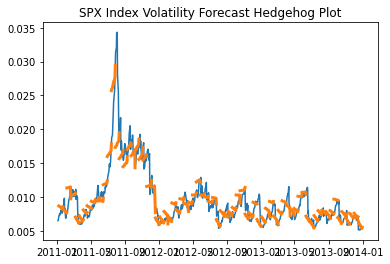

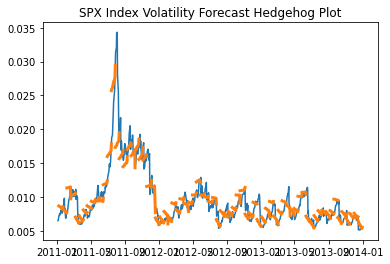

In [219]:
res.hedgehog_plot(simulations= 10000)

<AxesSubplot:xlabel='[mu, omega, alpha[1], beta[1]]', ylabel='[mu, omega, alpha[1], beta[1]]'>

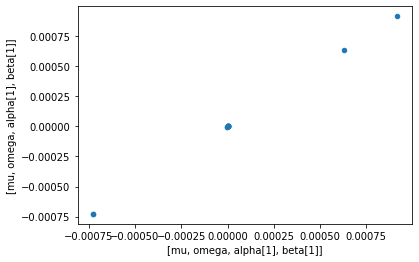

In [246]:
res.param_cov.plot.scatter(x=res.param_cov.index,y=res.param_cov.index)

<AxesSubplot:xlabel='Date'>

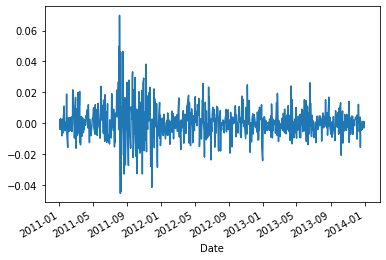

In [251]:
res.resid.plot()

COPULA VAR

EVT VAR